# Import all necessary packages

In [65]:
from collections import Counter
import pickle

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load in our transfusion and hemoglobin combined cohort

In [49]:
df = pickle.load(open('tx_hgb.pkl','rb'))
df

,stay_id_x,charttime,amount,itemid,icu_intime,hgb_charttime,hemoglobin,timed
51,30000484,2136-01-15 10:38:00,9.0,225168,2136-01-14 17:23:32,2136-01-15 04:28:00,8.1,0 days 06:10:00
12,30001446,2186-04-12 04:28:00,375.0,225168,2186-04-12 03:49:00,2186-04-12 02:00:00,7.9,0 days 02:28:00
68,30001555,2177-09-27 16:00:00,350.0,225168,2177-09-27 11:23:13,2177-09-27 11:50:00,7.6,0 days 04:10:00
36,30003598,2189-04-15 21:26:00,275.0,225168,2189-04-14 20:27:25,2189-04-15 02:46:00,9.6,0 days 18:40:00
39,30003749,2120-11-06 22:41:00,350.0,225168,2120-11-05 16:03:00,2120-11-06 21:45:00,7.0,0 days 00:56:00
...,...,...,...,...,...,...,...,...
93,39995735,2124-08-15 18:33:00,375.0,225168,2124-08-15 10:59:52,2124-08-15 18:00:00,11.0,0 days 00:33:00
2771,39996044,2164-12-11 11:45:00,46.0,225168,2164-12-10 17:50:47,2164-12-11 07:58:00,5.7,0 days 03:47:00
37,39998012,2133-02-06 14:30:00,285.0,225168,2133-02-03 06:48:42,2133-02-06 14:16:00,8.3,0 days 00:14:00
150,39999172,2185-02-18 05:57:00,375.0,225168,2185-02-17 15:01:00,2185-02-18 03:00:00,7.0,0 days 02:57:00


# Plot the hemoglobin and number of transfusions distribution

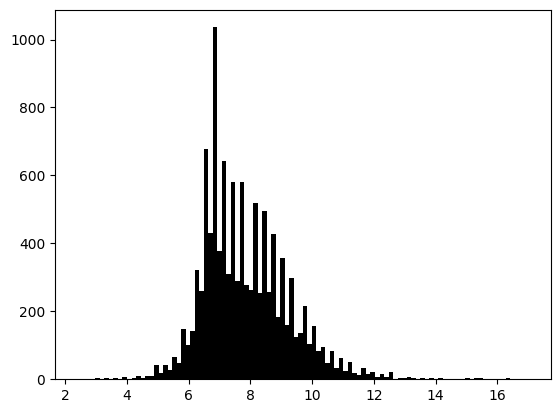

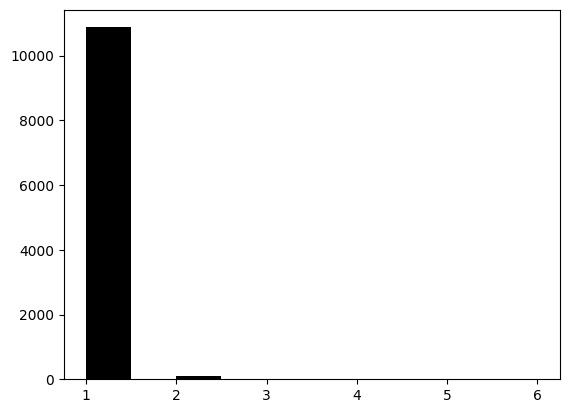

In [118]:
plt.figure()
plt.hist(df['hemoglobin'], bins=100, color='k')
plt.show()

plt.figure()
plt.hist(dict(Counter(df['stay_id_x'])).values(), color='k')
plt.show()

# Get the amount of each number of transfusions per patient

In [31]:
Counter(dict(Counter(df['stay_id_x'])).values())

Counter({1: 10876, 2: 105, 4: 2, 3: 8, 6: 1})

# Plot the hemoglobin disribution between patients with 1 and >1 transfusion

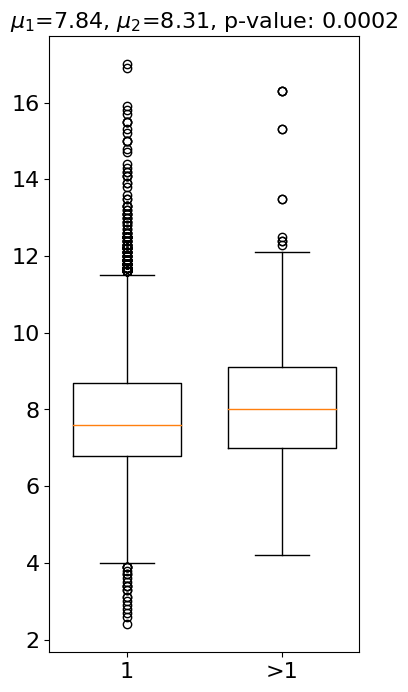

In [94]:
transfusion_counts = dict(Counter(df['stay_id_x']))
counts_one = [id for id,c in transfusion_counts.items() if c==1]
counts_one_plus = [id for id,c in transfusion_counts.items() if c>1]

hgb_one = np.array(df[df['stay_id_x'].isin(counts_one)]['hemoglobin'])
hgb_one_plus = np.array(df[df['stay_id_x'].isin(counts_one_plus)]['hemoglobin'])

plt.figure(figsize=(4,8))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.boxplot([hgb_one, hgb_one_plus], positions=[1,2], widths=[0.7,0.7])
ax.set_xticklabels(['1', '>1'], fontsize=16)

_,p_value = stats.ttest_ind(hgb_one, hgb_one_plus, equal_var=False)
plt.title(rf'$\mu_1$={np.mean(hgb_one):.2f}, $\mu_2$={np.mean(hgb_one_plus):.2f}, p-value: {p_value:.4f}', fontsize=16)

plt.show()

# Bin the patients by hemoglobin and get how much of the cohort each represents

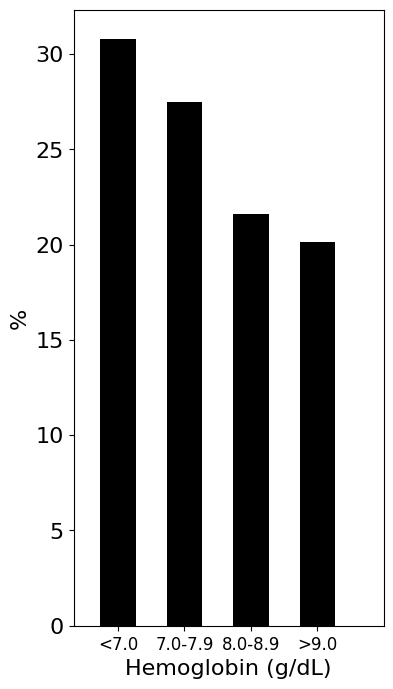

In [117]:
hemoglobin = np.array(df['hemoglobin'])
hemoglobin_counts = np.array([
    len([h for h in hemoglobin if h<7]),
    len([h for h in hemoglobin if h>=7 and h<8]),
    len([h for h in hemoglobin if h>=8 and h<9]),
    len([h for h in hemoglobin if h>=9])
])
hemoglobin_counts = 100 * hemoglobin_counts / np.sum(hemoglobin_counts)

plt.figure(figsize=(4,8))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.bar([1,2.5,4,5.5], hemoglobin_counts, color='k')
plt.xlim([0,7])
ax.set_xticks([1,2.5,4,5.5])
ax.set_xticklabels(['<7.0', '7.0-7.9', '8.0-8.9', '>9.0'], fontsize=12)
plt.xlabel('Hemoglobin (g/dL)', fontsize=16)
plt.ylabel('%', fontsize=16)

# _,p_value = stats.ttest_ind(hgb_one, hgb_one_plus, equal_var=False)
# plt.title(rf'$\mu_1$={np.mean(hgb_one):.2f}, $\mu_2$={np.mean(hgb_one_plus):.2f}, p-value: {p_value:.4f}', fontsize=16)

plt.show()